### Opis problemu
Wykrywanie i identyfikacja patologii na obrazach oraz precyzyjne pomiary mają kluczowe znaczenie w diagnozowaniu i leczeniu wielu schorzeń w dziedzinie medycyny. Celem tego projektu jest rozwiązanie istotnego problemu związanego z analizą obrazów ultrasonograficznych.

Inspiracja -> https://omdena.com/blog/pathology-streamlit/

In [1]:
# Import bibliotek
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

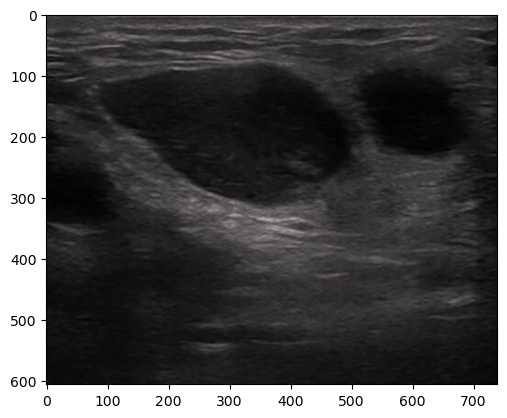

In [2]:
# Wczytaj obraz
img = cv2.imread("wezel-chlonny.jpg")
plt.imshow(img)

In [3]:
# Wyświetl rozmiar obrazu i ilość kanałów
img.shape

(606, 739, 3)

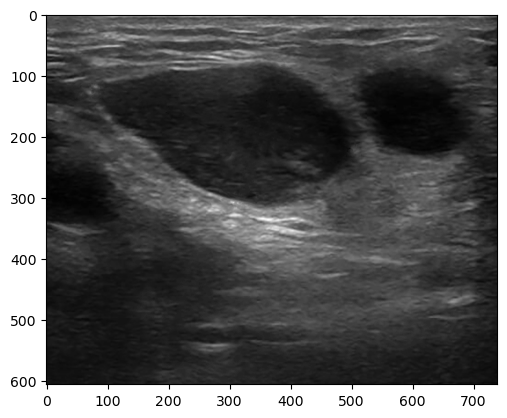

In [4]:
# Konwertuj na skalę szarości
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")

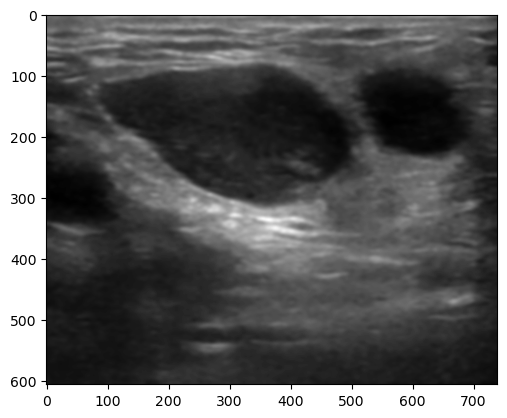

In [5]:
# Zastosowanie rozmycia w celu zredukowania szumów
kernel = (15, 15)
blur_img = cv2.GaussianBlur(img_gray, kernel, 0)
plt.imshow(blur_img, cmap="gray")

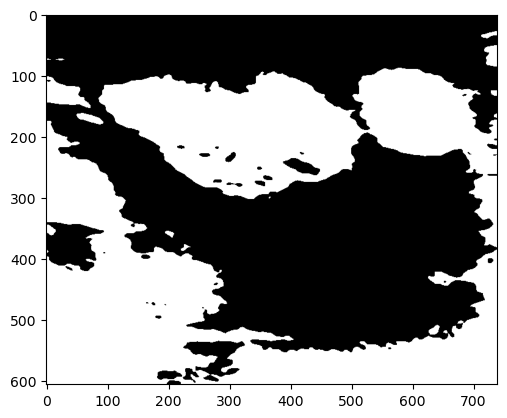

In [6]:
# Progowanie - konwertuj na obraz binarny
_, thresh = cv2.threshold(blur_img, 29, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap="gray")

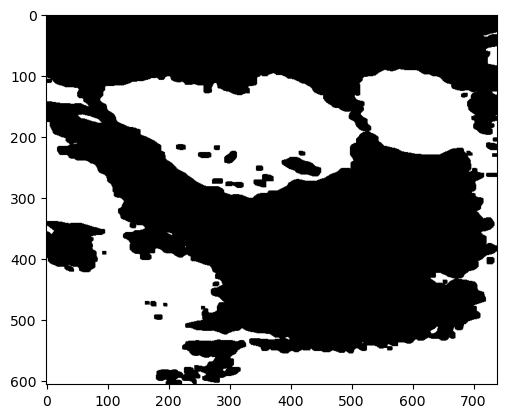

In [7]:
# Erozja - spróbuj rozdzielić kształty
kernel = np.ones((5, 5), np.uint8)
erode = cv2.erode(thresh, kernel, iterations=1)
plt.imshow(erode, cmap="gray")

In [8]:
# Znajdź kontury
contours, hierarchy = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

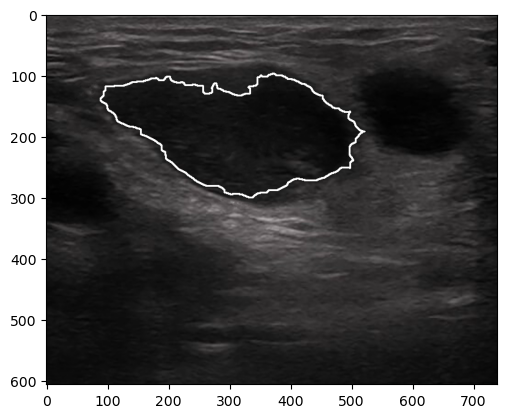

In [9]:
# Rysuj kontur z indeksem 19
cv2.drawContours(img, contours, 19, (255,255,255), 2)
plt.imshow(img)

In [10]:
def contour_coordinates(contour_index=19):
    """
    Funkcja zwraca min_X, max_X, min_Y, max_Y
    Następnie na tej podstawie możemy obliczyć
    długość oraz szerokość kształtu/konturu
    """
    contour = contours[contour_index]
    
    min_X = tuple(contour[contour[:,:,0].argmin()][0])
    max_X = tuple(contour[contour[:,:,0].argmax()][0])
    
    min_Y = tuple(contour[contour[:,:,1].argmin()][0])
    max_Y = tuple(contour[contour[:,:,1].argmax()][0])
    
    return min_X, max_X, min_Y, max_Y

In [11]:
# Rozpakowanie tupli
p1, p2, p3, p4 = contour_coordinates()

In [12]:
p1

(89, 138)

In [13]:
p2

(522, 192)

In [14]:
p3

(371, 97)

In [15]:
p4

(332, 300)

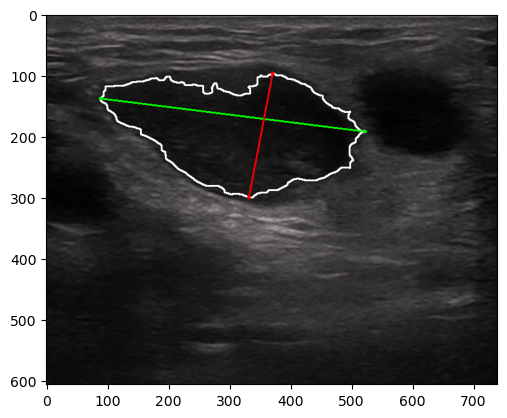

In [16]:
def draw_lines(img, min_x, max_x, min_y, max_y):
    """
    Funkcja rysuje na obrazie 2 linie reprezentujące
    długość oraz szerokość kształtu
    """
    # Narysuj punkty dla najmniejszego x i dla najwiekszego x
    cv2.circle(img, min_x, 3, (0,255,0), -1)
    cv2.circle(img, max_x, 3, (0,255,0), -1)

    # Narysuj punkty dla najmniejszego y i dla najwiekszego y
    cv2.circle(img, min_y, 3, (255,0,0), -1)
    cv2.circle(img, max_y, 3, (255,0,0), -1)

    cv2.line(img, min_x, max_x, (0,255,0), 2)
    cv2.line(img, min_y, max_y, (255,0,0), 2)
    plt.imshow(img)

draw_lines(img=img, min_x=p1, max_x=p2, min_y=p3, max_y=p4)

In [17]:
def calculate_length(p1, p2):
    """
    Funkcja pobiera tuple jako współrzędne
    dla długości
    """
    ### Oblicz długość oraz szerokość konturu
    # Odległość Euklidesowa:
    # distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    import math
    x1, y1 = p1
    x2, y2 = p2

    distance = round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),0)
    return distance

In [18]:
def calculate_width(p3, p4):
    """
    Funkcja pobiera tuple jako współrzędne
    dla szerokości
    """
    ### Oblicz długość oraz szerokość konturu
    # Odległość Euklidesowa:
    # distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    import math
    x1, y1 = p3
    x2, y2 = p4

    distance = round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),0)
    return distance

In [19]:
length = calculate_length(p1, p2)
width = calculate_width(p3, p4)
# Długość i szerokość wyrażona w pikselach
print(f"Długość = {length}, Szerokość: {width}")

Długość = 436.0, Szerokość: 207.0


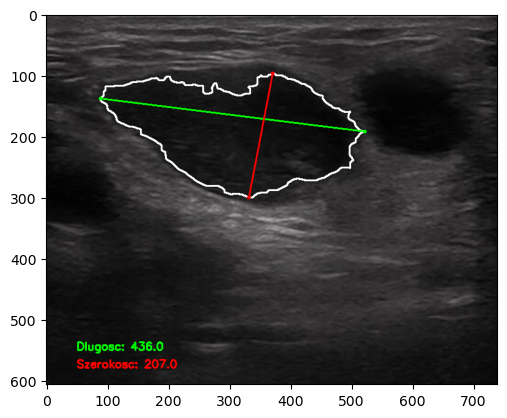

In [20]:
# Wstaw tekst na obrazie zawierający długość oraz szerokość ozaznaczonego obiektu.
cv2.putText(img, f"Dlugosc: {length}", (50, 550), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
cv2.putText(img, f"Szerokosc: {width}", (50, 579), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)
plt.imshow(img)

### Podsumowanie
Opracowano notatnik, w którym jako dane wejściowe został zaimportowany obraz badania ultrasonograficznego węzła chłonnego. Następnie przeprowadzono podstawowe etapy przetwarzania obrazu, aby zidentyfikować obiekt węzła, narysować jego kontur oraz obliczyć długość i szerokość. Dla osiągnięcia wyższej precyzji możliwe byłoby przeprowadzenie treningu sieci neuronowej, co znacząco zwiększyłoby dokładność pomiarów.